In [1]:
import numpy as np
from sklearn.model_selection import KFold
import scipy.io as sio

In [2]:
crossvalidation = False
data_path 	= 'dataset/'
NO_splits = 5 # number of folds in cross validation
NO_channels = 22 # number of EEG channels
NO_subjects = 9
Window_Length = 7*250
NO_tests = 6*48

In [3]:
def get_data(subject,training,PATH):
	class_return = np.zeros(NO_tests)
	data_return = np.zeros((NO_tests,NO_channels,Window_Length))

	NO_valid_trial = 0
	if training:
		a = sio.loadmat(PATH+'A0'+str(subject)+'T.mat')
	else:
		a = sio.loadmat(PATH+'A0'+str(subject)+'E.mat')
	a_data = a['data']
	for ii in range(0,a_data.size):
		a_data1 = a_data[0,ii]
		a_data2=[a_data1[0,0]]
		a_data3=a_data2[0]
		a_X 		= a_data3[0]
		a_trial 	= a_data3[1]
		a_y 		= a_data3[2]
		a_fs 		= a_data3[3]
		a_classes 	= a_data3[4]
		a_artifacts = a_data3[5]
		a_gender 	= a_data3[6]
		a_age 		= a_data3[7]
		for trial in range(0,a_trial.size):
			if(a_artifacts[trial]==0):
				data_return[NO_valid_trial,:,:] = np.transpose(a_X[int(a_trial[trial]):(int(a_trial[trial])+Window_Length),:22])
				class_return[NO_valid_trial] = int(a_y[trial])
				NO_valid_trial +=1


	return data_return[0:NO_valid_trial,:,:], class_return[0:NO_valid_trial]

In [4]:
def load_data(subject):
        if crossvalidation:
            data,label = get_data(subject ,True, data_path)
            kf = KFold(n_splits=NO_splits)
            split = 0
            for train_index, test_index in kf.split(data):
                if split == split:
                    train_data = data[train_index]
                    train_label = label[train_index]
                    eval_data = data[test_index]
                    eval_label = label[test_index]
                split += 1
        else:
            train_data, train_label = get_data(subject, True, data_path)
            eval_data, eval_label = get_data(subject, False, data_path)
            
        return train_data, train_label, eval_data, eval_label

In [5]:
X = []
y = []

for subject in range(1,NO_subjects+1):
    train_data, train_label, eval_data, eval_label = load_data(subject)
    train_data = train_data.reshape(train_data.shape[0], -1)
    eval_data = eval_data.reshape(eval_data.shape[0], -1)
    X.append(train_data)
    X.append(eval_data)
    y.append(train_label)
    y.append(eval_label)

X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

In [6]:
print(X.shape)
print(y.shape)

(4696, 38500)
(4696,)


In [9]:
import matplotlib.pyplot as plt

time_axis = np.linspace(1, 7 * NO_channels, 	Window_Length * NO_channels)

In [12]:
y[0:10]

array([4., 3., 2., 1., 1., 2., 3., 4., 2., 3.])

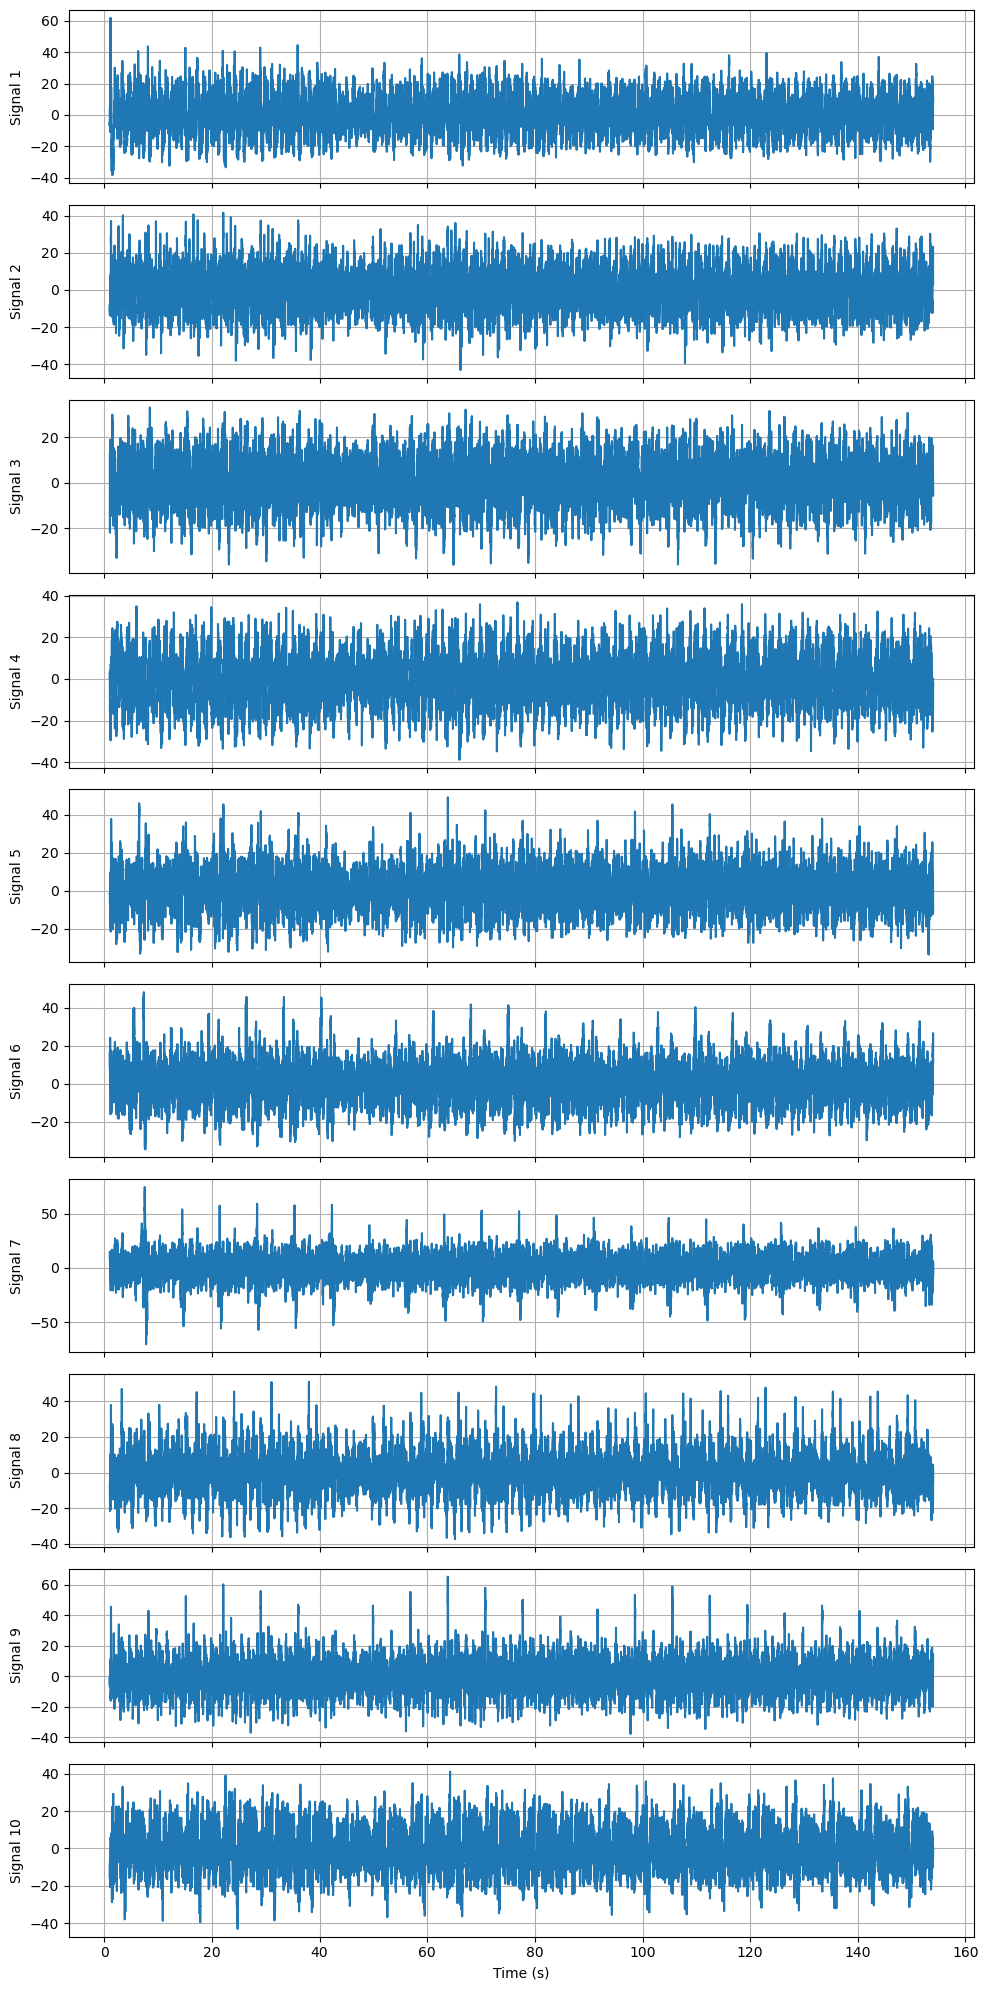

In [10]:
fig, axs = plt.subplots(10, 1, figsize=(10, 20), sharex=True)

for i in range(10):
    axs[i].plot(time_axis, X[i])
    axs[i].set_ylabel(f'Signal {i+1}')
    axs[i].grid(True)

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()